# Plot

## Librairies

In [206]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Plots

In [207]:
# Choose your run file
file = os.path.join(os.getcwd(), "new_simul_19.csv")
df = pd.read_csv(file, header="infer")

In [208]:
df

,memory_length,nb_attractors,min_attractors,max_attractors,eta,tick
0,1,12,12,12,0.1500,0
1,1,12,12,12,0.1500,0
2,1,88,88,88,0.1500,0
3,1,70,70,70,0.1500,0
4,1,45,45,45,0.1500,0
...,...,...,...,...,...,...
2994,368,39,26,39,0.0075,0
2995,367,39,26,39,0.0075,0
2996,366,39,26,39,0.0075,0
2997,365,39,26,39,0.0075,0


In [209]:
steps = df.index.values                     # List of simulation steps (x-axis)
ticks = df["tick"].values.nonzero()[0]      # List of ticks (memory data points)
memory = df["memory_length"].values         # List of memory size values
nb_attractors = df["nb_attractors"].values  # List of number of attractors
learning_rates = df["eta"].values           # List of learning rates

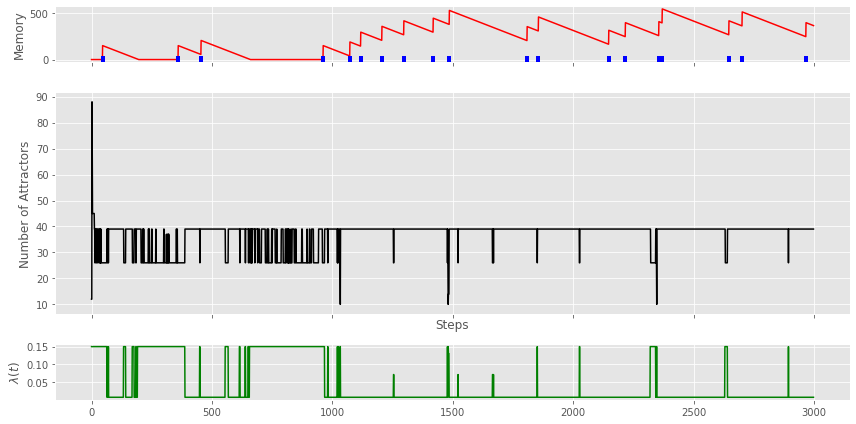

In [210]:
import matplotlib.pyplot as plt

# Create a figure and set of subplots with custom heights for each row
fig, (ax2, ax1, ax3) = plt.subplots(3, 1, figsize=(12, 6), sharex=True, gridspec_kw={'height_ratios': [0.5, 2, 0.5]})

# Plot the memory on the first subplot (ax2), which is the shorter plot
ax2.plot(steps, memory, color='red', alpha=1)
# Add vertical lines at each tick in ax1
for tick in ticks:
    ax2.axvline(x=tick, ymin=0, ymax=0.075, linewidth=4, color='blue')
ax2.set_ylabel('Memory', size=12)
ax2.tick_params(axis='y')
ax2.grid(True)

# Plot the number of attractors on the second subplot (ax1), which is the taller plot
ax1.plot(steps, nb_attractors, color='black', label='Number of Attractors')
ax1.set_xlabel('Steps', size=12)
ax1.set_ylabel('Number of Attractors', size=12)
ax1.tick_params(axis='y')
ax1.grid(True)

# Plot the learning rates
ax3.plot(steps, learning_rates, color='green', alpha=1)
ax3.set_ylabel('$\lambda(t)$', size=12)
ax3.tick_params(axis='y')
ax3.grid(True)

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.savefig("plots/STDP_19.pdf")
plt.show()
